# Discussion Questions

Let's discuss some issues about the past election from the perspective of data science.

---

Polling is a popular method to measure public opinion, especially with respect to political candidates. However, polling data can be biased in many ways. A famous example of a polling mistake occured around the 1936 U.S. election(https://en.wikipedia.org/wiki/1936_United_States_presidential_election): the Literary Digest, an influential magazine which had correctly predicted the previous five elections, predicted that Republican candidate Alf Landon would defeat Democratic candidate Franklin D. Roosevelt in a landslide. In the end, Roosevelt won all states expect ME and VT. 

How did the Literary Digest make such a big mistake? A convincing hypothesis is that their sampling method was biased: they polled their own readers, people found in vehicle registration lists, and telephone owners. These features correlate with wealth, and weathly individuals at the time were not happy with Roosevelt's "New Deal". Other studies suggest(https://en.wikipedia.org/wiki/The_Literary_Digest) that non-response bias was the main reason for the misleading poll results: people who disliked Roosevelt were more likely to respond the survey.

**What other factors do you think may affect the accuracy of poll in general?**

---

You likely saw a lot of "exit poll" data covered in news reports on election day. An election exit poll is a poll of voters taken immediately after they have exited the polling stations ([more info here](https://en.wikipedia.org/wiki/Exit_poll)).

**What advantages do you think exit polls have compared with to other election-related polls? What biases do you think exist in exit polls?**

---

Many institutions make predications about elections based on polling data (eg. [FiveThirtyEight](https://projects.fivethirtyeight.com/2020-election-forecast/) and [The Economist](https://projects.economist.com/us-2020-forecast/president)). They may use phrases  like "Candidate A has a 40% chance of winning, and candidate B has a 60% chance of winning" or "The likelihood of Candidate A winning is 2 in 5, and the likelihood of candidate B's winning is 3 in 5".

**How do you understand these statements? Is the winner already determined by these polls?**

---

Many predictions will give a range of likely election results, because sampled pre-election data can never perfectly predict the full result of an election. 

**What factors do you think may contribute to the difference between poll-based predictions and the real election results?**

### **Note:** You do NOT need to include answers to the above questions in your homework submission. They are for in-section discussion only.

# Homework 6



In [13]:
%matplotlib inline
## import libraries
import numpy
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

---

## Problem 1 (6 pts)

We will explore the relationship between the price of a diamond and its properties (e.g. color, carat weight). A description of these features can be found [here](https://www.kaggle.com/shivam2503/diamonds), while a glossary of diamond-related terms can be found [here](https://www.lumeradiamonds.com/diamond-education/glossary).

Load `diamonds.csv` using `pandas` into a variable called `diamonds`. Use the `.head()` method to display the dataset's columns and first five rows. What features do you think will be correlated with the price of diamonds? Do you believe a linear model is a suitable choice for any of these features? Justify your answer.

---

In [166]:
diamonds = pd.read_csv('hw6/diamonds.csv')
diamonds.head() 

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


The carat and the dimensions (x,y,z) of the diamond will probably will have a positive correlation with the price. A linear model would be appropriate for the carat but not for the individual dimensions. There probably is a linear relationship between how much the diamond weighs and the price. One dimensional quantities will likely not have a linear relationship. The mass inherently is a quantity that represents three-dimensional objects and so one-dimensional metrics will not have the same relationship as the carat, under the assumption that all diamonds utilized have essentially the same density. The relationship between the the individual dimensions and the price would be positive, but not linear.

---

## Problem 2 (2 pts)

Linear regression requires all variables to be numeric, but the values for several features in this dataset are strings.

One way to deal with this issue is to create an *indicator variable*. An indicator variable simply indicates whether or not an observation is in a category. The variable is equal to 1 if the observation is in the category, and 0 if not. 

Use the `pandas.get_dummies()` function(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) on *just* the `cut` column and display the first few rows of this result. Do **not** modify the `diamonds` object with this new data frame, we are going to do this another way in the next problem.

(*Confidence check: you will get a new dataframe with five indicator variables; one for each cut category.*)

---

In [167]:
cut_dummies = pd.get_dummies(diamonds.cut)
cut_dummies.head()

,Fair,Good,Ideal,Premium,Very Good
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0


---

## Problem 3 (4 pts)

Another way is to map these strings to a predefined set of numeric values. This method works well when there is a natural ordering to the categories, that we can reflect in the numeric values.

Use the [`.map()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html) along with the dictionaries defined below to change the string values in the `cut`, `color` and `clarity` columns to numeric values. Update the `diamonds` dataframe with these new columns (overwrite the old columns containing strings). 

Next, create a new feature, `volume`, based on the `x`, `y`, and `z` dimensions in the data.

$$Volume = x*y*z$$

Compute the volume of each diamond and store the result in a new column named `volume` in the `diamonds` dataframe.

Use `.head()` to display the first five rows of new diamond dataset.

---

In [168]:
## All of these are ordered from worst to best
cut_map = {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}
color_map = {"J": 1, "I": 2, "H": 3, "G": 4, "F": 5, "E": 6, "D": 7}
clarity_map = {"I1": 1, "SI2": 2, "SI1": 3, "VS2": 4, "VS1": 5, "VVS2": 6, "VVS1": 7, "IF": 8}

In [169]:
diamonds.cut = diamonds.cut.map(cut_map)
diamonds.color = diamonds.color.map(color_map)
diamonds.clarity = diamonds.clarity.map(clarity_map)

In [170]:
diamonds['volume'] = diamonds.x*diamonds.y*diamonds.z
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75,51.917250


---

## Problem 4 (6 pts)

For each of the features `carat`, `cut`, `color`, `clarity`, and `volume`, use `LinearRegression` in `sklearn.linear_model` to train a model that predicts `price` given the specified feature. (That is, perform five different single linear regressions, where `price` is always the output variable, and the input feature is one of `carat`, `cut`, `color`, `clarity`, or `volume`.) In each case, print the name of the predictor variable, followed by the regression slope and $r^2$ for that variable. Be sure to print your results with informative labels and using numbers rounded to two decimal places.

*Hint: a "for" loop will make your howework easier here.*

---

In [171]:
from sklearn.metrics import r2_score

In [172]:
lst = ['carat', 'cut', 'color', 'clarity', 'volume']

for i in lst:
    linear_model = LinearRegression()
    linear_model.fit(numpy.asarray(diamonds[i]).reshape(-1,1), diamonds.price) 
    y_predict = linear_model.predict(numpy.asarray(diamonds[i]).reshape(-1,1))
    score = r2_score(diamonds.price,y_predict)
    print(i)
    
    coef = linear_model.coef_[0]
    print('Estimated regression slope: ', numpy.round(coef, 2))
    print('Estimated coefficient of determination: ', round(score,2))
    

carat
Estimated regression slope:  7756.43
Estimated coefficient of determination:  0.85
cut
Estimated regression slope:  -191.11
Estimated coefficient of determination:  0.0
color
Estimated regression slope:  -404.57
Estimated coefficient of determination:  0.03
clarity
Estimated regression slope:  -355.56
Estimated coefficient of determination:  0.02
volume
Estimated regression slope:  46.01
Estimated coefficient of determination:  0.81


---

## Problem 5 (3 pts)

For each of the models you trained in problem 4, interpret the resulting regression slope (i.e. what does this coefficient imply about how changes in the variable relate to changes in price?). 



---

The regression slope quantifies the predicted change in price of the diamond per unit of increase in one of the parameters of the diamond.

---

## Problem 6 (8 pts)

Train a multivariable linear regression model that uses four of the five inputs jointly to predict diamond price. Print the coefficients for each predictor and the $r^2$ score of the model.

Explain how you decided which of the potential predictor variables to exclude.

---

In [173]:
multi_reg = LinearRegression()
multi_reg.fit(diamonds[['carat','color','clarity','volume']], diamonds.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [174]:
lst.remove('cut')

In [175]:
for i in range(0, len(lst)):
    print('Regression Coefficient of', lst[i],': ',round(multi_reg.coef_[i],2))
    
price_predict = multi_reg.predict(diamonds[['carat','color','clarity','volume']])
multi_score = r2_score(diamonds.price, price_predict)
print('Coefficient of Multiple Determination: ', round(multi_score,2))
    

Regression Coefficient of carat :  8435.06
Regression Coefficient of color :  319.82
Regression Coefficient of clarity :  541.56
Regression Coefficient of volume :  1.98
Coefficient of Multiple Determination:  0.9


The cut was removed as a predictor as it had the weakest coefficient of determination when it was individually evaluated for predicting price.

---

## Problem 7 (4 pts)

Compare the regression slopes from the four single linear regressions performed in problem 4 to the regression slopes from the multivariable regression performed in problem 6. What has changed between the regressions in the two problems? Do you find any of these changes surprising?

Compare the $r^2$ values from problems 4 and 6. Based on these results, which model do you believe predicts diamond price most accurately? 

---

The regression coefficients are all positive, unlike those in problem 4 in which some were negative. It is suprising to see the change in sign of regression coefficients as it intially seems counterintuitive and contrary to how the problem presented itself when looking at the relations of the individual independent variables with price. The $r^2$ value in the multivariate case is greater than those found in any of the simple linear regressions and therefore predicts diamond price more accurately.

---

## Problem 8 (2 pts)

Let's explore another dataset. Load `Fish.csv` using `pandas` into a variable called `fish`. Identify the species whose individuals are lightest on average. You may find it helpful to refer to the [data description](https://www.kaggle.com/aungpyaeap/fish-market).

---

In [176]:
fish = pd.read_csv('hw6/Fish.csv')
fish.groupby(['Species']).Weight.mean()

Species
Bream        617.828571
Parkki       154.818182
Perch        382.239286
Pike         718.705882
Roach        152.050000
Smelt         11.178571
Whitefish    531.000000
Name: Weight, dtype: float64

On average, the smelt is the lightest.

---

## Problem 9 (10 pts)

Find which four species have the most observations in the dataset. Update `fish`, keeping only observations from these four species.

Using the data in the updated `fish` data frame, make three scatterplots to examine the relationships between

1. `Height` and `Width`,
2. `Height` and `Weight`,
3. `Width` and `Weight`,

where the species of each observation is indicated by point color.

Discuss whether a linear regression is a suitable model for the relationship between each pair of variables.

Describe the patterns you observe in each scatterplot. *(This is an open-ended question, but we expect you to make at least two informative and distinct points per scatterplot.)*

---

In [177]:
observation_count = fish['Species'].value_counts().rank()
top_four = pd.Series(observation_count[observation_count >= 4].index)
top_four

0    Perch
1    Bream
2    Roach
3     Pike
dtype: object

In [178]:
fish  = fish[(fish.Species == top_four[0]) | (fish.Species == top_four[1]) | (fish.Species == top_four[2]) | (fish.Species == top_four[3])]

Text(0,0.5,'Width (cm)')

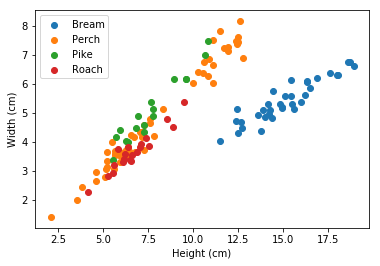

In [179]:
species = fish.groupby('Species')
for i,j in species:
    plt.scatter(j.Height, j.Width, label = i)
plt.legend()
plt.xlabel('Height (cm)')
plt.ylabel('Width (cm)')

A linear regression is not a suitable model here. All but the bream fish follow a similar, linear trend. The bream has a somewhat linear pattern but is offset with a larger height for the respective values of width compared the other fish.

Text(0,0.5,'Weight (g)')

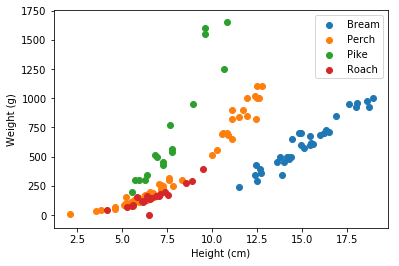

In [180]:
for i,j in species:
    plt.scatter(j.Height, j.Weight, label = i)
plt.legend()
plt.xlabel('Height (cm)')
plt.ylabel('Weight (g)')


A linear regressional model will not work here. The trend in the roach relatively coincides with the trend of the perch. These two have very different trends compared to the bream and roach, which also have very different slopes and behave aprroximately linearly, unlike the perch.

Text(0,0.5,'Weight (g)')

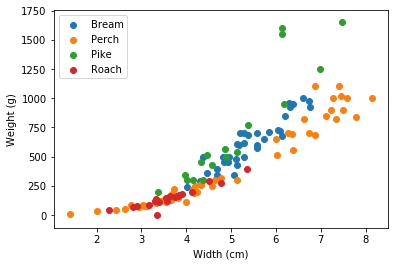

In [181]:
for i,j in species:
    plt.scatter(j.Width, j.Weight, label = i)
plt.legend()
plt.xlabel('Width (cm)')
plt.ylabel('Weight (g)')

A linear regression model will not work here. All of the species follow a similar trend in which the rate of growth in weight increases with the change in width. The pike shows a somewhat faster growth towards the high end in width whereas the perch slows down.

---

## Problem 10 (6 pts)

Make a three-dimensional scatterplot to demonstrate the relationship between `Height` (x-axis), `Width` (y-axis) and `Weight` (z-axis) in one graph (again for the updated `fish` data frame). Color each point by species. Label the axes and color legend with the appropriate variable name.

Do you prefer the individual 2D scatterplots or the all-encompassing 3D graph? Why? *(Open-ended question!)*

*(Hint: Here is a [tutorial](https://pythonprogramming.net/3d-scatter-plot-customizing/) on 3D scatterplots. You don't have to use this specific method for 3D plotting.)*

---

In [182]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5,0,'Weight (g)')

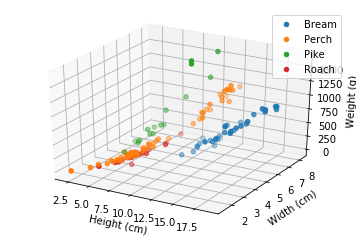

In [183]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i,j in species:
    ax.scatter(j.Height, j.Width, j.Weight, label = i)
ax.legend()
ax.set_xlabel('Height (cm)')
ax.set_ylabel('Width (cm)')
ax.set_zlabel('Weight (g)')

I like the 3d graph for allowing the viewer to simultaneously observe the relationship between any two variables as well as see how multiple variables together have influence on a dependent variable.